In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import math
import cv2

# Describe the Environment


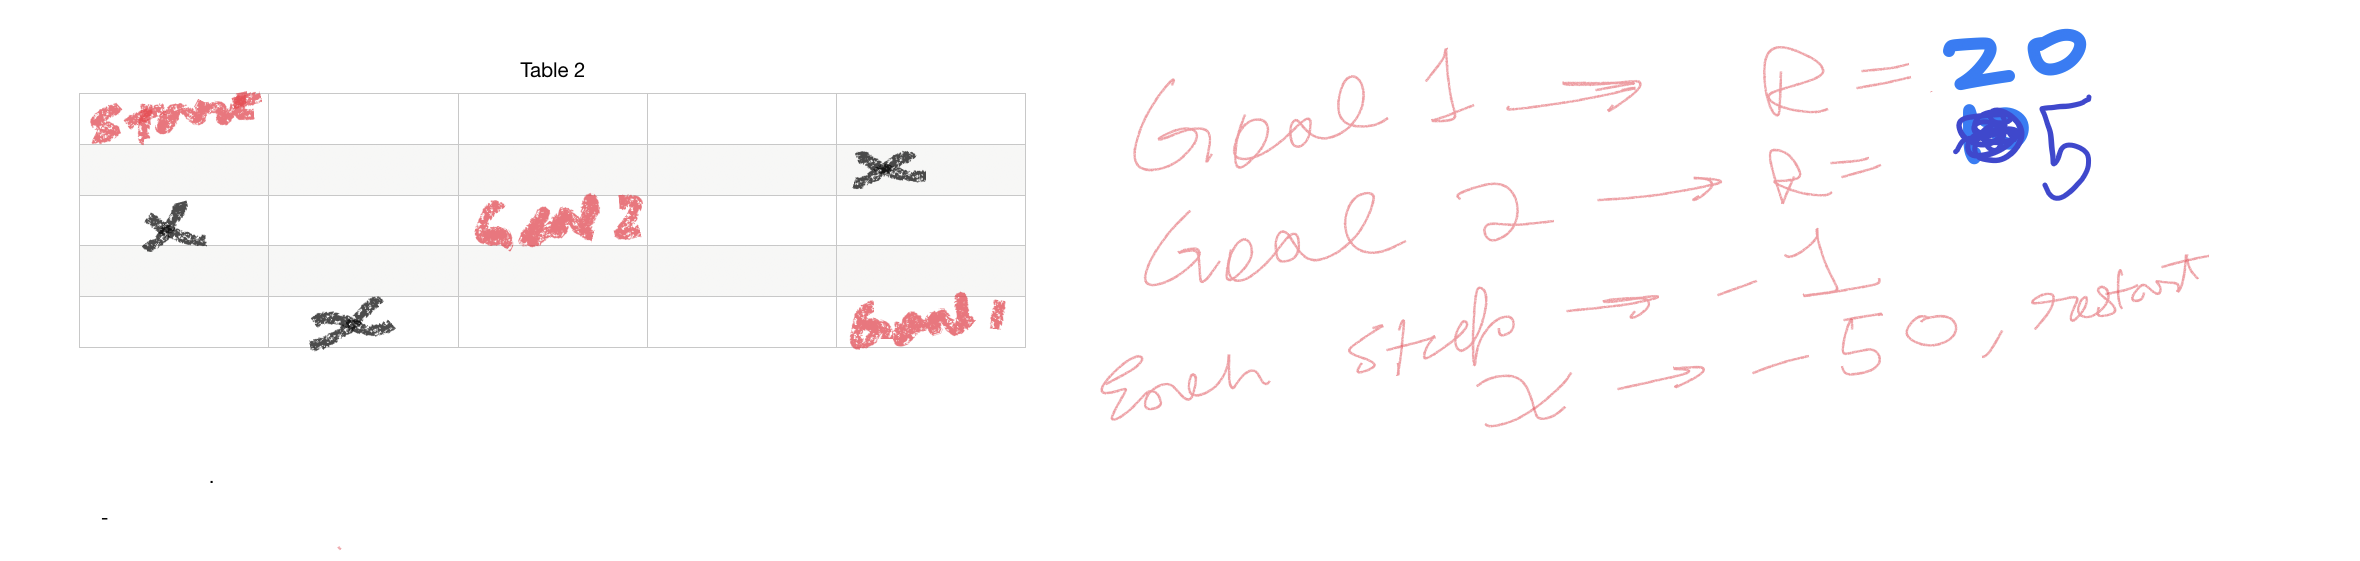

In [16]:
image=  Image.open(r'c:/Users/samak/Desktop/WORK/RL/Assignment/Practice/My_grid/env.png')
image

### The max reward this environment can give is +13, if we reach Goal1.
### So,we need to find a policy which sends us to Goal 1, in the shortest way possible and we must not fall in Cross

# SARSA

In [3]:
total_episodes= 25000*4
e=0.95
min_e= 0.1

Start=0
alpha=0.2
gamma=0.99
decay_rate=0.005

Goal= [24,12]
Cross= [9,10,21]
REWARDS=[]

#In the action space: 0-->left | 1-->up | 2-->right | 3-->down
actions= {0:'left', 1:'up', 2:'right', 3:'down'}
Q= np.zeros((25,4))

for episode in range(total_episodes):
    state=Start
    a= np.random.randint(4)
    done= False
    Tr=0
    while not done:
        reward=-1
        next_state=state
        
        #Left
        if(a==0 and state%5!=0):
            next_state= state-1
  
        #Up
        if(a==1 and state>4):
            next_state= state-5
       
        #Right       
        if(a==2 and state%5!=4):
            next_state= state+1
      
        #Down        
        if(a==3 and state<20):
            next_state= state+5
   

       #Check if we reached Terminal States 
        if(next_state in Cross):
            reward= -50
            done=True
        
        if(next_state in Goal):
            if(next_state==24):
                reward= 20
            else:
                reward=5
                
            done= True
            
        
        P=[e/4,e/4,e/4,e/4]
        greedy_a= np.argmax(Q[next_state])
        P[greedy_a]+= (1-e)
        next_a= np.random.choice([0,1,2,3], p=P)
        
        Q[state][a]= Q[state][a] + (alpha*(reward+ (gamma*Q[next_state][next_a])- Q[state][a]))
        
        a= next_a
        state= next_state
                                    
        Tr+=reward
        
    REWARDS.append(Tr)
    e= min_e + ((0.9-min_e)*np.exp(-decay_rate*episode))
    
    print(episode, end=' \r')
            

# State Action Value Table After Training

In [15]:
Q=Q.round(2)
for k in range(25):
    print('State',k,':', Q[k])

State 0 : [2.81 2.25 6.82 1.21]
State 1 : [1.45 2.27 2.46 9.56]
State 2 : [2.1  3.05 3.13 6.7 ]
State 3 : [3.14 1.9  1.2  1.25]
State 4 : [  4.6   -8.06   0.54 -43.29]
State 5 : [ -0.9    1.53   6.87 -50.  ]
State 6 : [ 2.4   2.75 11.41  3.25]
State 7 : [ 3.24  3.56 14.48  5.  ]
State 8 : [  9.23   2.68 -50.    15.95]
State 9 : [0. 0. 0. 0.]
State 10 : [0. 0. 0. 0.]
State 11 : [-50.     4.57   5.     2.46]
State 12 : [0. 0. 0. 0.]
State 13 : [ 5.   11.93 15.85 17.35]
State 14 : [ 15.6  -50.    15.88  18.71]
State 15 : [ -0.49 -18.    13.59  -0.68]
State 16 : [ 11.18  11.05  15.88 -49.7 ]
State 17 : [ 5.47  5.   16.92 13.75]
State 18 : [15.93 15.62 18.61 18.08]
State 19 : [16.59 17.2  18.78 20.  ]
State 20 : [ -0.36   1.   -10.    -0.57]
State 21 : [0. 0. 0. 0.]
State 22 : [-33.62  14.99   8.99  -0.2 ]
State 23 : [12.55 16.43 20.   18.25]
State 24 : [0. 0. 0. 0.]


# EVALUATE THE OPTIMAL POLICY USING Q TABLE ABOVE

In [5]:
REWARD=[]
for runs in range(500):
    
    state=0
    done=False
    Tr=0
    while not done:
        
        reward=-1
        next_state=state
        a= np.argmax(Q[state])
        
        #Left
        if(a==0 and state%5!=0):
            next_state= state-1
  
        #Up
        if(a==1 and state>4):
            next_state= state-5
       
        #Right       
        if(a==2 and state%5!=4):
            next_state= state+1
      
        #Down        
        if(a==3 and state<20):
            next_state= state+5
            
       #Check if we reached Terminal States 
        if(next_state in Cross):
            reward= -50
            done=True
        
        if(next_state in Goal):
            if(next_state==24):
                reward= 20
            else:
                reward=5
                
            done= True
        
        state= next_state
        Tr+=reward
    
    REWARD.append(Tr)
   
        

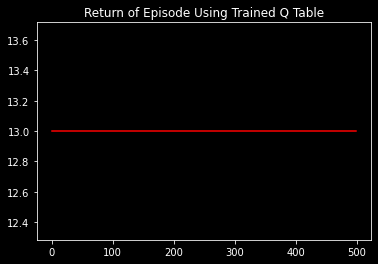

In [21]:
plt.style.use('dark_background')
plt.title('Return of Episode Using Trained Q Table')
plt.plot(REWARD, color='red')
plt.show()